In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
file_path = '/content/Data_Analysis_Project.xlsx'
df = pd.read_excel(file_path, sheet_name='Data')
df

,Product,Month ID(YYYYMM),Defects,Opportunities,Mean Rate,2 Sigma limit,3 Sigma limit
0,Laptop,201607,37,222,81319,188681,242363
1,Laptop,201608,26,36,81319,188681,242363
2,Laptop,201609,66,375,81319,188681,242363
3,Laptop,201610,61,494,81319,188681,242363
4,Laptop,201611,64,980,81319,188681,242363
5,Laptop,201612,104,1298,81319,188681,242363
6,Laptop,201701,85,2292,81319,188681,242363
7,Laptop,201702,98,2445,81319,188681,242363
8,Laptop,201703,130,2460,81319,188681,242363
9,Laptop,201704,107,1889,81319,188681,242363


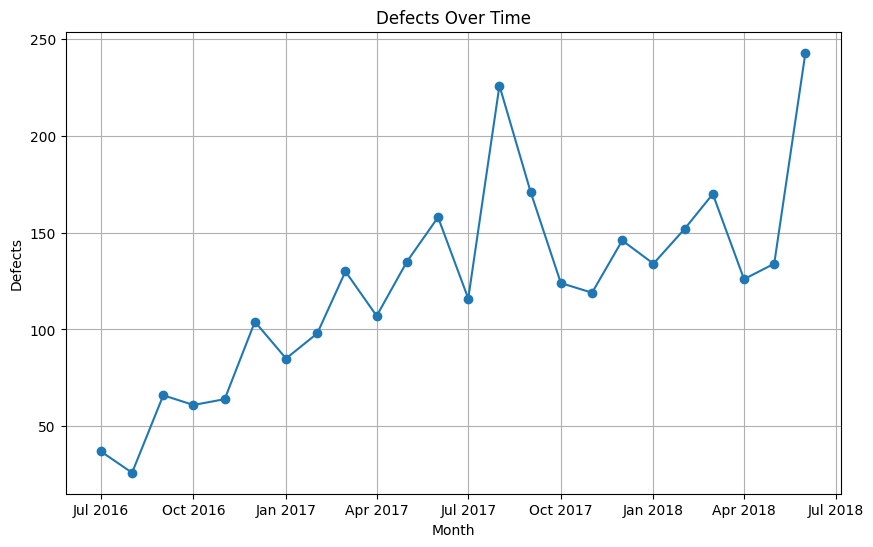

In [28]:
# 1
df['Month ID(YYYYMM)'] = pd.to_datetime(df['Month ID(YYYYMM)'].astype(str), format='%Y%m')

# Set the datetime column as the index
df.set_index('Month ID(YYYYMM)', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Defects'], marker='o')

# Format the x-axis to show month abbreviations
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

plt.title('Defects Over Time')
plt.xlabel('Month')
plt.ylabel('Defects')
plt.grid(True)
plt.show()

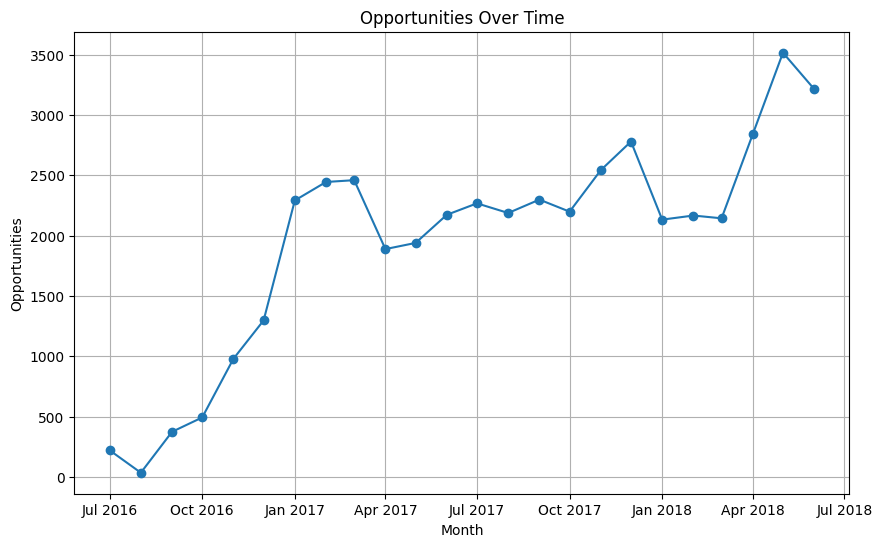

In [29]:
# 2
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Opportunities'], marker='o')

# Format the x-axis to show month abbreviations
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

plt.title('Opportunities Over Time')
plt.xlabel('Month')
plt.ylabel('Opportunities')
plt.grid(True)
plt.show()

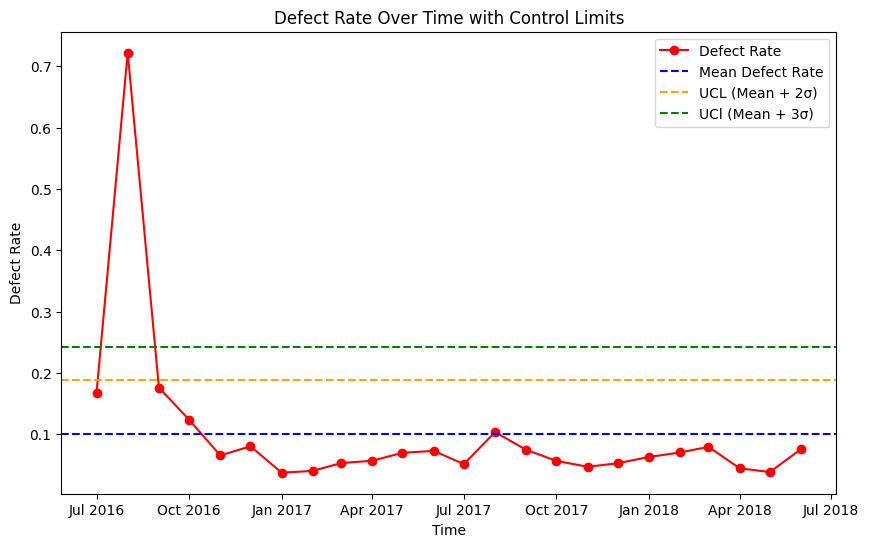

In [30]:
# 3

defect_rate = df['Defects']/df['Opportunities']
mean_defect_rate = defect_rate.mean()
limit_2std = df['2 Sigma limit']/1000000
limit_3std = df['3 Sigma limit']/1000000
std_defect_rate = defect_rate.std()

plt.figure(figsize=(10, 6))
plt.plot(df.index, defect_rate, marker='o', linestyle='-', color='r', label='Defect Rate')
plt.axhline(y=mean_defect_rate, color='blue', linestyle='--', label='Mean Defect Rate')
plt.axhline(y=limit_2std[0], color='orange', linestyle='--', label='UCL (Mean + 2σ)')
plt.axhline(y=limit_3std[0], color='green', linestyle='--', label='UCl (Mean + 3σ)')
plt.title('Defect Rate Over Time with Control Limits')
plt.xlabel('Time')
plt.ylabel('Defect Rate')
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

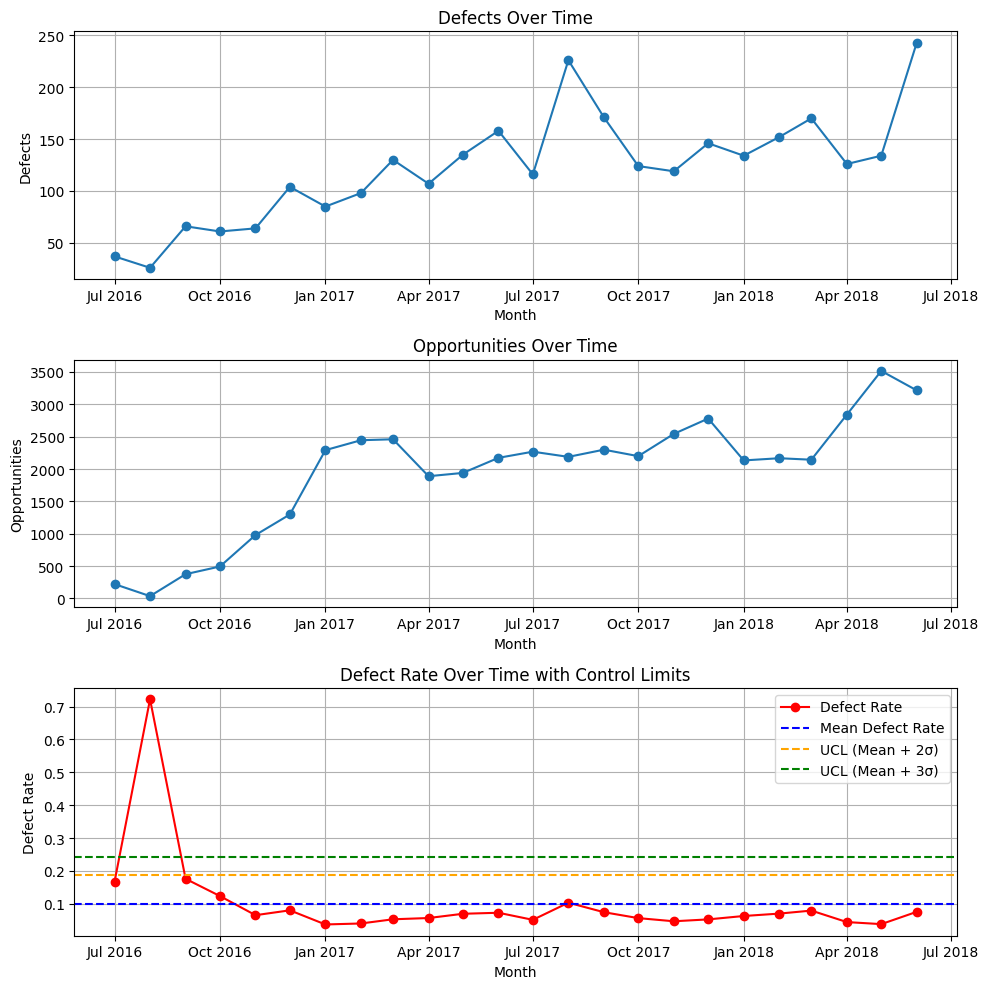

In [39]:

defect_rate = df['Defects'] / df['Opportunities']
mean_defect_rate = defect_rate.mean()
limit_2std = df['2 Sigma limit'] / 1000000
limit_3std = df['3 Sigma limit'] / 1000000

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot 1: Defects Over Time
axes[0].plot(df.index, df['Defects'], marker='o')
axes[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
axes[0].set_title('Defects Over Time')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Defects')
axes[0].grid(True)

# Plot 2: Opportunities Over Time
axes[1].plot(df.index, df['Opportunities'], marker='o')
axes[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
axes[1].set_title('Opportunities Over Time')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Opportunities')
axes[1].grid(True)

# Plot 3: Defect Rate Over Time with Control Limits
axes[2].plot(df.index, defect_rate, marker='o', linestyle='-', color='r', label='Defect Rate')
axes[2].axhline(y=mean_defect_rate, color='blue', linestyle='--', label='Mean Defect Rate')
axes[2].axhline(y=limit_2std[0], color='orange', linestyle='--', label='UCL (Mean + 2σ)')
axes[2].axhline(y=limit_3std[0], color='green', linestyle='--', label='UCL (Mean + 3σ)')
axes[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
axes[2].set_title('Defect Rate Over Time with Control Limits')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Defect Rate')
axes[2].legend()
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

** # 5**


1.  for the first plot we can see that the # of defects is lower around July 2016  and higher when around July 2018, although around July 2017 we see a big spike of defects.
2.   for the second graph we can see that the number of opportunites over time have a more stable outcome compared to the first plot, since the first plot has deeper spikes and multiple. And we could see that it's most steady around April to October 2017.
3.  The last plot tells you about the defected rates trends in where it fluctuates and where it is the most stable, here we see that it fluctuates between July 2016 and before October 2016 and then it is the most stable after October 2016.


